In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("cityday.csv")

In [4]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-15,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-15,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-15,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-15,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-15,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-20,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-20,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-20,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-20,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [5]:
# Checking shape and data types of the data :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
# Summary Statistics of the numeric data :
summary_statistics = data.describe()


In [7]:
summary_statistics.to_csv('summary_statistics.csv')


The DataFrame has 16 columns.
There are 14 columns that have missing values.



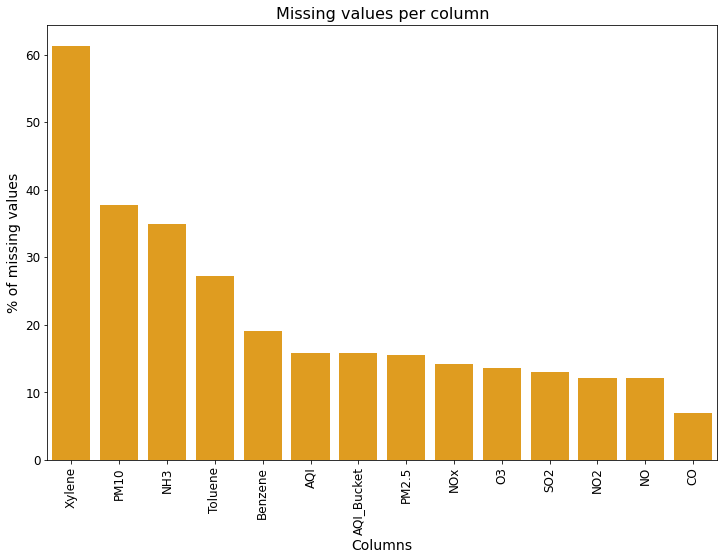

,Missing Values,% of Total Values
Xylene,18109,61.32
PM10,11140,37.72
NH3,10328,34.97
Toluene,8041,27.23
Benzene,5623,19.04
AQI,4681,15.85
AQI_Bucket,4681,15.85
PM2.5,4598,15.57
NOx,4185,14.17
O3,4022,13.62


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def missing_values_table(df):
    # Total missing values
    missing_val = df.isnull().sum()
    
    # Percentage of missing values
    missing_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
    
    # Rename the columns
    missing_val_table_ren_columns = missing_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing values in descending order, 
    # ignoring the columns with no missing values.
    missing_val_table_ren_columns = missing_val_table_ren_columns[
        missing_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=False).round(2)
    
    # Print summary information
    print(f"The DataFrame has {df.shape[1]} columns.\n"
          f"There are {missing_val_table_ren_columns.shape[0]} columns that have missing values.\n")
    
    # Plot the percentage of missing values for each column
    plt.subplots(figsize=(12,8))
    sns.barplot(y=missing_val_table_ren_columns['% of Total Values'], x=missing_val_table_ren_columns.index, color='orange')
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Columns', fontsize=14)
    plt.ylabel('% of missing values', fontsize=14)
    plt.title('Missing values per column', fontsize=16)
    plt.show()
    
    # Return the dataframe with missing information
    return missing_val_table_ren_columns
missing_values_table(data)

In [9]:
# Calculate the skewness for each column of the dataset
skewness = data.skew()

# Print the skewness for each column
print(skewness)

PM2.5       3.369960
PM10        2.053189
NO          3.883166
NO2         2.464560
NOx         2.569915
NH3         4.083993
CO          8.878322
SO2         4.083660
O3          1.330119
Benzene    21.304218
Toluene    11.666129
Xylene      7.891515
AQI         3.396757
dtype: float64


Skewness is a measure of asymmetry in a dataset. A skewness value of 0 indicates that the data is perfectly symmetric, and a positive (or right) skewness value indicates that the data has a longer tail on the right side of the distribution. On the other hand, a negative (or left) skewness value indicates that the data has a longer tail on the left side of the distribution.
Based on these skewness values, we can say that the variables PM2.5, NO, NH3, CO, SO2, Benzene, Toluene, Xylene, and AQI are highly positively skewed, which means that these variables have a longer tail on the right side of the distribution. The variables PM10, NO2, and O3 are also positively skewed but to a lesser extent.

Therefore, filling with median value is a possible choice

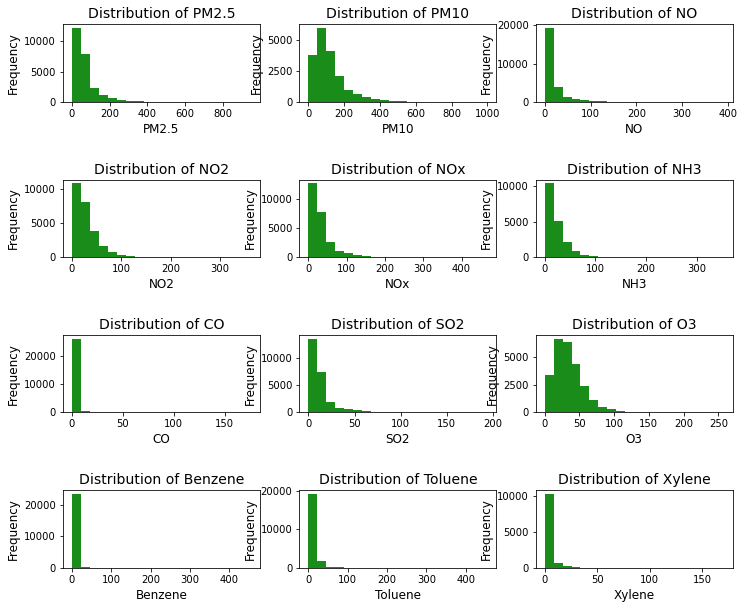

In [10]:
# Set the size of the figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
plt.subplots_adjust(hspace=1)

# Create a histogram for each specified variable
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for ax, col in zip(axes.flatten(), features):
    ax.hist(data[col], bins=20, alpha=0.9, color='green')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.set_title("Distribution of " + col, fontsize=14)

# Show the plot
plt.show()

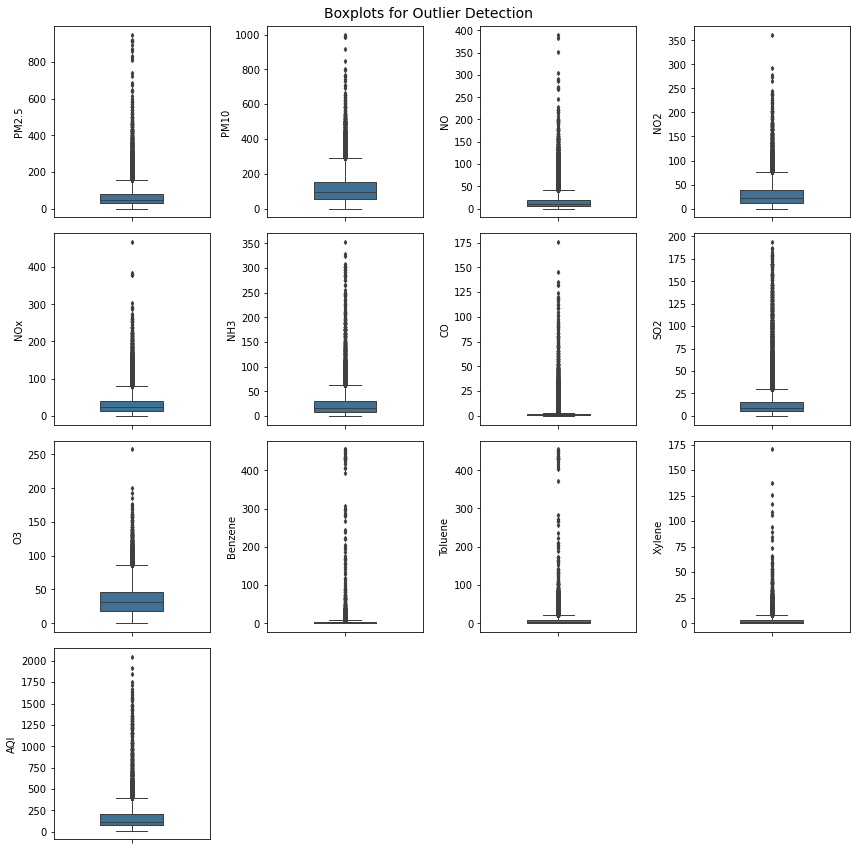

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to check for outliers
cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(cols):
    sns.boxplot(y=data[col], ax=axes[i], width=0.4, fliersize=3, linewidth=1, notch=False, saturation=0.6)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=10)

# Remove empty subplots
for i in range(len(cols), len(axes)):
    axes[i].remove()

# Add a title to the figure
fig.suptitle('Boxplots for Outlier Detection', fontsize=14)

# Adjust spacing between subplots and save the figure
fig.tight_layout()
plt.savefig('outlier_boxplots.png')
plt.show()


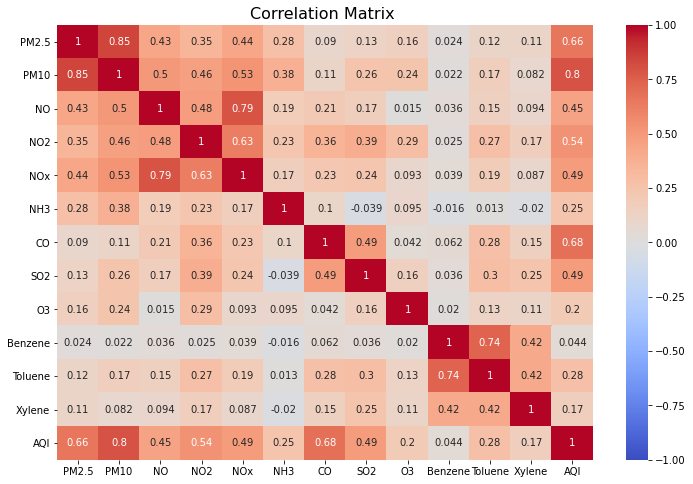

In [12]:
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix
corr = data.corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix ", fontsize=16)
plt.savefig('Corelation.png')
plt.show()

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\Anaconda3\lib\site-

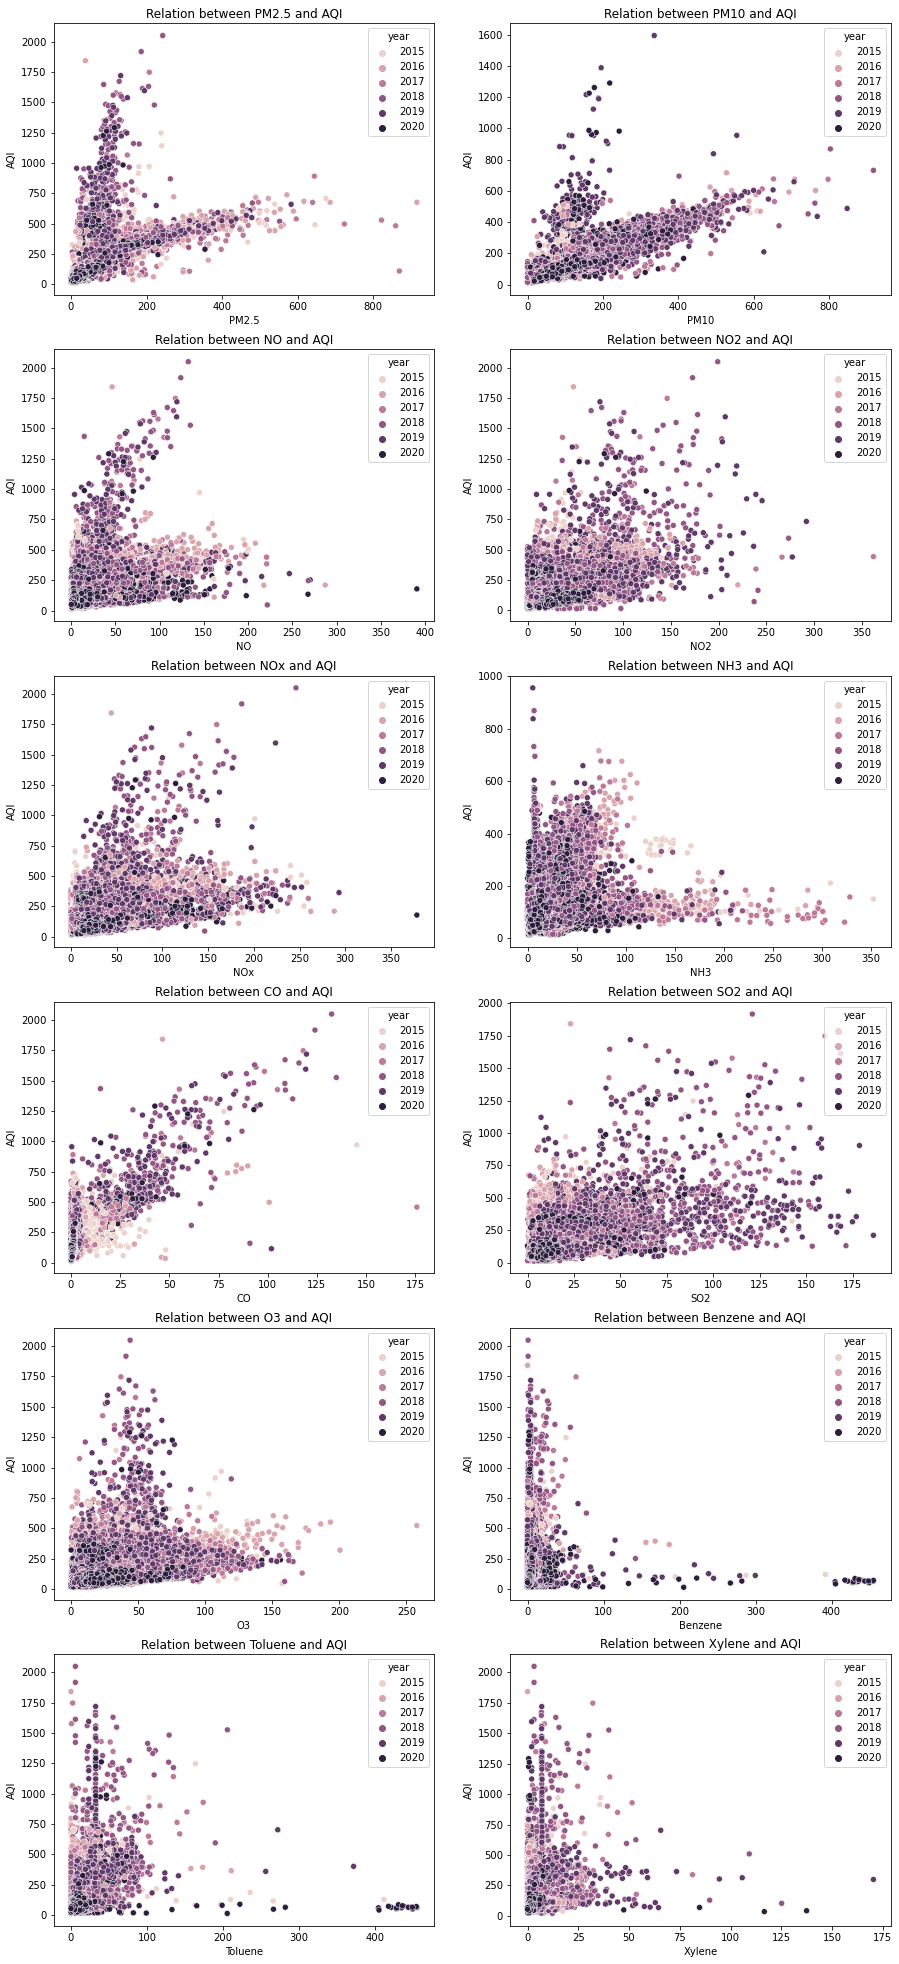

In [14]:
variables = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx',"NH3",'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
fig= plt.figure(figsize=(15,35))
for variable, num in zip(variables, range(1, len(variables) + 1)):
    ax = fig.add_subplot(6,2,num)
    sns.scatterplot(variable, 'AQI', hue='year', data=data)
    plt.title('Relation between {} and AQI'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('AQI')

In [15]:
avg_pollution = data.groupby(['City', 'year']).mean().reset_index()


In [16]:
avg_pollution

,City,year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015,79.262545,NaN,13.589770,21.254118,33.278954,NaN,13.589770,32.037680,31.347401,4.631667,12.417745,3.286078,310.950570
1,Ahmedabad,2016,62.501200,NaN,14.889120,14.962880,27.634160,NaN,14.889120,17.774400,19.680442,1.623923,4.053149,1.150000,310.162393
2,Ahmedabad,2017,88.756438,NaN,30.774462,78.433077,60.342800,NaN,30.774462,101.615846,51.998889,7.566894,23.034286,5.902484,558.768116
3,Ahmedabad,2018,74.688788,NaN,33.244408,84.937493,60.431983,NaN,33.244408,69.924061,39.753020,8.104931,37.543196,6.035620,622.263305
4,Ahmedabad,2019,62.118468,120.146256,26.133844,91.090864,62.849008,NaN,26.133844,72.792169,46.587849,5.231317,44.047874,5.284264,516.352273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Visakhapatnam,2016,44.859153,87.930730,16.662528,42.408539,32.844494,13.376685,1.089438,21.595337,43.528371,6.240618,10.661348,6.833539,103.976048
99,Visakhapatnam,2017,56.866534,108.467898,13.123693,33.400385,12.280907,8.757704,0.508187,10.402655,49.227126,1.895467,3.615247,1.181319,143.094340
100,Visakhapatnam,2018,50.433072,116.658295,12.441936,38.963750,30.560983,12.113035,0.718696,11.234070,38.256058,4.804409,11.164841,3.218242,122.819018
101,Visakhapatnam,2019,47.378584,115.198261,13.957831,37.734113,31.372197,10.175499,0.863859,12.964958,33.010676,4.138056,9.111014,2.517859,123.442815


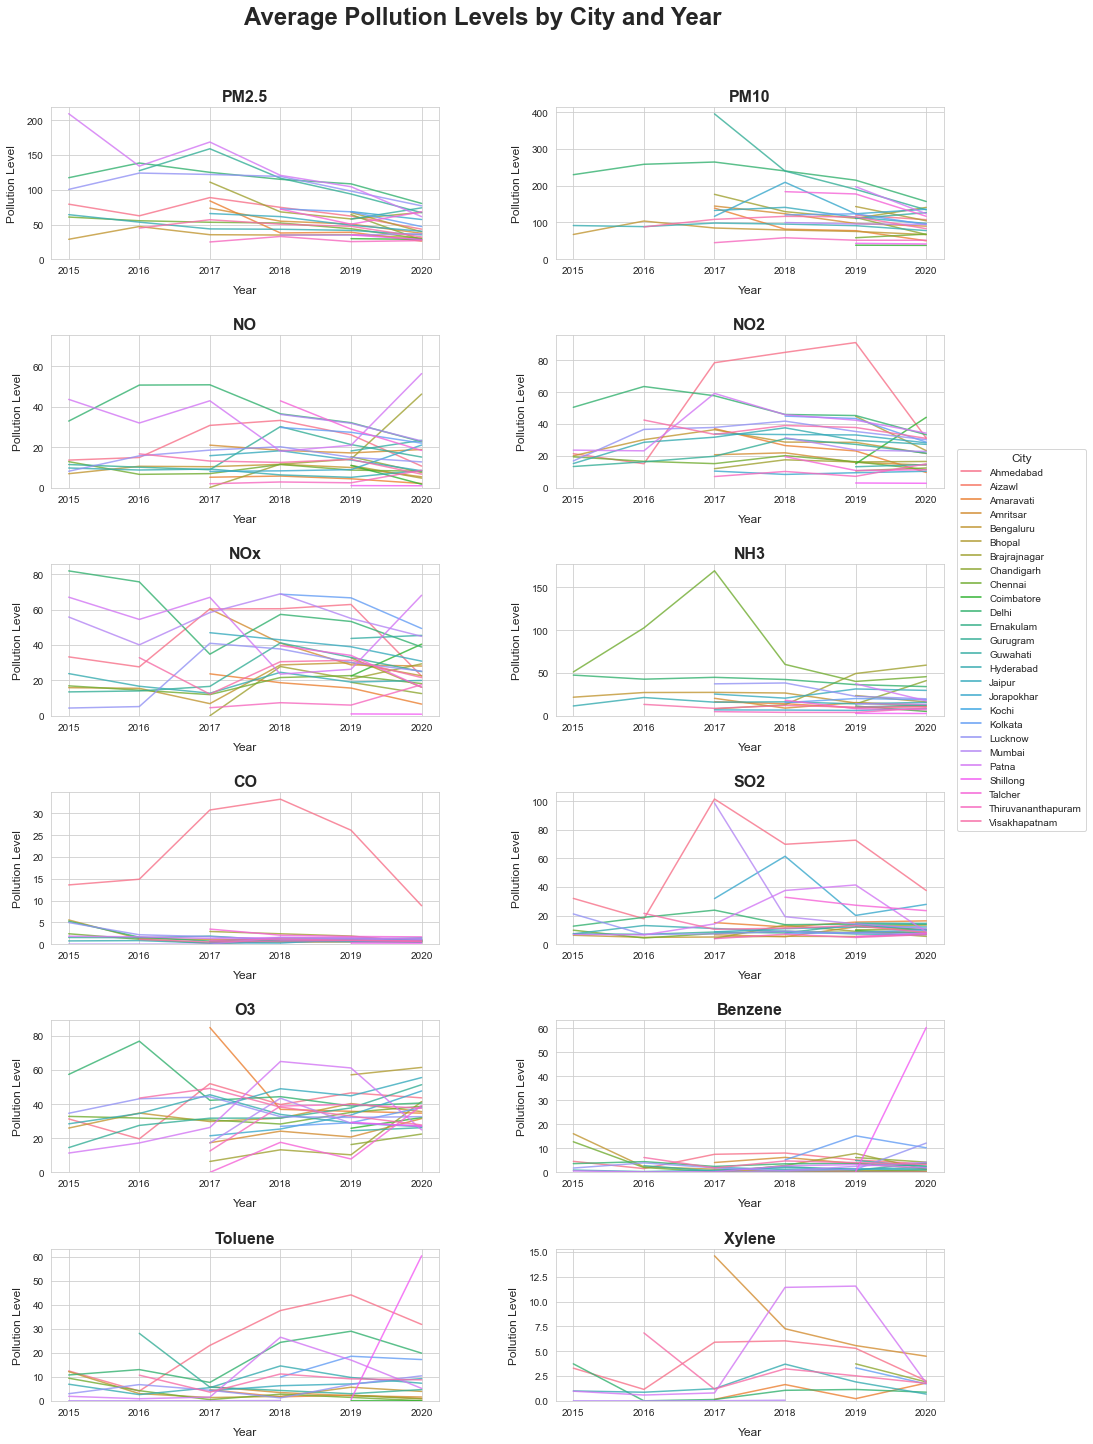

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of pollution factors
pollution_factors = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Create a line chart for each pollution factor
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(16, 28))

for i, factor in enumerate(pollution_factors):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    if factor == 'City':
        continue
    sns.lineplot(x='year', y=factor, hue='City', data=avg_pollution, ax=ax, linewidth=1.5, alpha=0.8)
    ax.set_title(f'{factor}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12, labelpad=10)
    ax.set_ylabel('Pollution Level', fontsize=12, labelpad=10)
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='both', which='major', labelsize=10)
    if i == len(pollution_factors) - 2:
        ax.legend(fontsize=10, title='City', title_fontsize=12, loc='center', bbox_to_anchor=(2.5, 5))
    else:
        ax.legend().remove()
    for line in ax.lines:
        line.set_linestyle('-')
    
# Remove the last row and column of plots
fig.delaxes(axs[-1, -1])
fig.delaxes(axs[-1, -2])
# Add a title for the entire plot
fig.suptitle('Average Pollution Levels by City and Year', fontsize=24, fontweight='bold', y=0.93)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.savefig('Average Pollution.png')

plt.show()

To predict AQI (Air Quality Index), it would be best to keep all the columns that are related to the major air pollutants that affect AQI. These include:

PM2.5 (Particulate Matter 2.5 micrometers or less in diameter)
PM10 (Particulate Matter 10 micrometers or less in diameter)
NO2 (Nitrogen Dioxide)
SO2 (Sulfur Dioxide)
O3 (Ozone)
CO (Carbon Monoxide)
Columns such as NH3 (Ammonia), Benzene, Toluene, and Xylene may also contribute to air pollution, but they are not considered major air pollutants that directly affect AQI. Therefore, they could be dropped if they are not needed for the specific analysis or prediction of AQI.

In [18]:
data.drop(['year'],axis=1,inplace=True)

# Filled by Median

In [19]:
df1 = data.copy()

In [20]:
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-02-01,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-03-01,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-04-01,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-05-01,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [21]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-02-01,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-03-01,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-04-01,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-05-01,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [22]:
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

In [23]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-02-01,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-03-01,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-04-01,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-05-01,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


In [24]:
# In this we are not concidering the AQI_Bucket column, because it is not nessasary for our analysis.
# Here, we do analysis on all over country, so Aggregating the data into month wise and creating the new dataframe.

AQI_df = df1.groupby(['City', (df1.Date.dt.strftime('%Y-%m'))]).mean()

# Reset index :
AQI_df = AQI_df.reset_index()

# Check the First 5 observation :
AQI_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01,59.889355,95.68,10.713226,23.601935,31.936129,15.85,10.132581,42.265484,45.604516,1.137742,1.997419,3.529355,194.709677
1,Ahmedabad,2015-02,100.989643,95.68,22.957143,27.920000,48.301429,15.85,21.671429,48.687500,34.886071,11.321786,26.991429,6.545357,432.821429
2,Ahmedabad,2015-03,103.978387,95.68,15.398710,26.264839,40.346129,15.85,15.108387,50.096452,41.925484,10.037742,27.892258,4.687419,406.516129
3,Ahmedabad,2015-04,92.409333,95.68,9.870667,20.661000,29.218333,15.85,9.570667,41.869667,33.267333,2.466333,6.499667,4.722333,269.766667
4,Ahmedabad,2015-05,81.157742,95.68,11.037097,19.456774,29.059355,15.85,10.746774,31.094194,30.407097,5.650968,15.018065,4.156129,271.354839


In [25]:
AQI_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01,59.889355,95.680000,10.713226,23.601935,31.936129,15.850000,10.132581,42.265484,45.604516,1.137742,1.997419,3.529355,194.709677
1,Ahmedabad,2015-02,100.989643,95.680000,22.957143,27.920000,48.301429,15.850000,21.671429,48.687500,34.886071,11.321786,26.991429,6.545357,432.821429
2,Ahmedabad,2015-03,103.978387,95.680000,15.398710,26.264839,40.346129,15.850000,15.108387,50.096452,41.925484,10.037742,27.892258,4.687419,406.516129
3,Ahmedabad,2015-04,92.409333,95.680000,9.870667,20.661000,29.218333,15.850000,9.570667,41.869667,33.267333,2.466333,6.499667,4.722333,269.766667
4,Ahmedabad,2015-05,81.157742,95.680000,11.037097,19.456774,29.059355,15.850000,10.746774,31.094194,30.407097,5.650968,15.018065,4.156129,271.354839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,Visakhapatnam,2020-08,24.710000,70.776667,5.603333,25.760000,18.195000,9.993333,0.583333,8.581667,28.241667,3.013333,7.826667,1.500000,71.500000
1215,Visakhapatnam,2020-09,30.166667,82.170000,9.716667,32.765000,25.136667,10.401667,0.653333,7.825000,27.925000,3.851667,8.908333,2.715000,81.166667
1216,Visakhapatnam,2020-10,28.403333,66.558333,4.108333,28.076667,18.201667,9.851667,0.590000,7.256667,30.520000,3.165000,8.321667,1.585000,72.666667
1217,Visakhapatnam,2020-11,38.651667,80.835000,5.301667,28.236667,19.273333,10.483333,0.643333,7.233333,30.431667,3.415000,8.963333,1.520000,80.666667


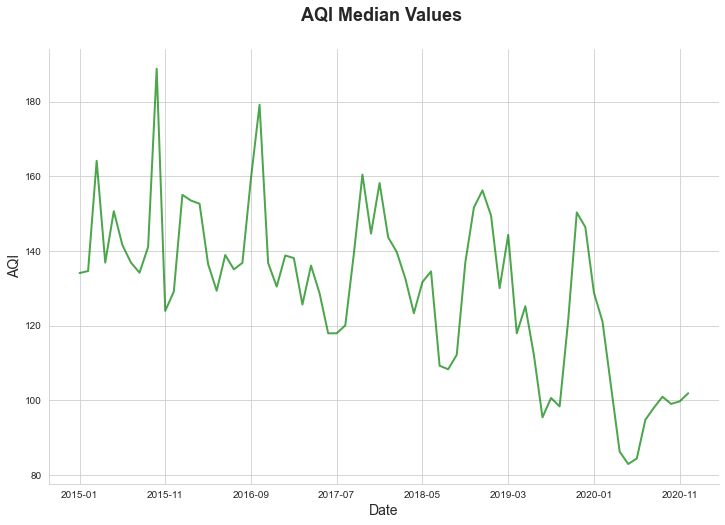

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by date and compute the median AQI for each date
median_aqi_by_date1 = AQI_df.groupby('Date')['AQI'].median()

# Create a line plot of the mean AQI values
fig, ax = plt.subplots(figsize=(12, 8))
median_aqi_by_date1.plot(kind='line', ax=ax, color='green', linewidth=2, alpha=0.7)

# Customize the plot
ax.set_title('AQI Median Values ', fontsize=18, fontweight='bold', y=1.05)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('AQI', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.despine()

# # Add shaded regions to highlight specific areas of interest
# ax.axvspan('2020-01', '2020-11', color='red', alpha=0.2)
# ax.text('2020-06-01', 200, 'LOCKDOWN', fontsize=12, color='black', ha='left', va='center')

plt.savefig('Median AQI.png')
# Show the plot
plt.show()


In [27]:
# df1.drop(['year'],axis=1,inplace=True)

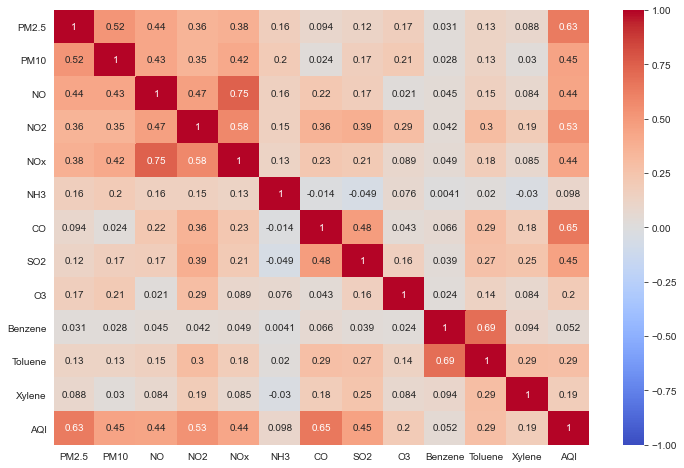

In [28]:
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix
corr = df1.corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# Comparing with values replaced by Median

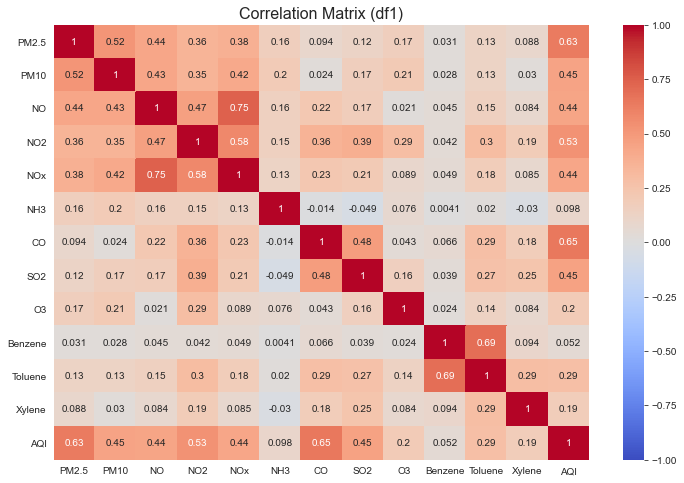

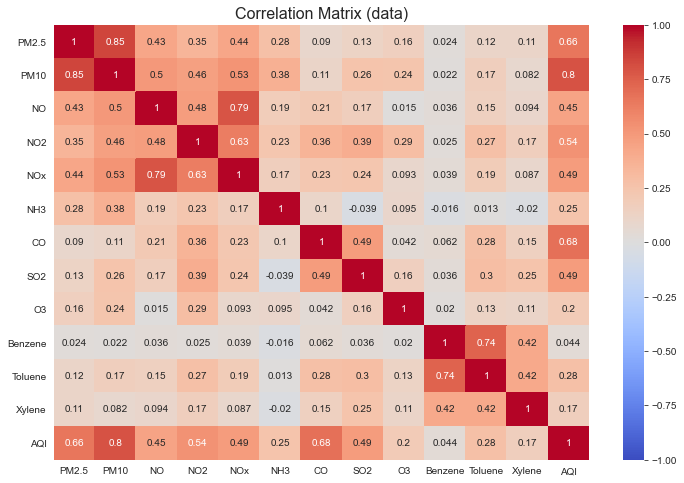

In [29]:
# Plot correlation matrix for df1
plt.figure(figsize=(12, 8))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (df1)", fontsize=16)
plt.show()

# Plot correlation matrix for data
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix (data)", fontsize=16)
plt.show()


Looking at the corelation matrix, we can clearly see that these gases( NH3 (Ammonia), Benzene, Toluene, and Xylene) are not highly corelated to AQI and may also contribute to air pollution, but they are not considered major air pollutants that directly affect AQI. Therefore, they could be dropped if they are not needed for the specific analysis or prediction of AQI.

Looking at the missing values graph, Xylene had more missing values of more than 60%. So this is resonable to drop these columns

In [30]:
df1.drop(['NH3','Benzene','Toluene','Xylene'],axis=1,inplace=True)
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,0.92,27.64,133.36,118.0,Moderate
1,Ahmedabad,2015-02-01,48.57,95.68,0.97,15.69,16.46,0.97,24.55,34.06,118.0,Moderate
2,Ahmedabad,2015-03-01,48.57,95.68,17.40,19.30,29.70,17.40,29.07,30.70,118.0,Moderate
3,Ahmedabad,2015-04-01,48.57,95.68,1.70,18.48,17.97,1.70,18.59,36.08,118.0,Moderate
4,Ahmedabad,2015-05-01,48.57,95.68,22.10,21.42,37.76,22.10,39.33,39.31,118.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,0.47,8.55,23.30,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,0.52,12.72,30.14,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,0.48,8.42,30.96,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,0.52,9.84,28.30,54.0,Satisfactory


In [31]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['year'] = df1['Date'].dt.year

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\Anaconda3\lib\site-

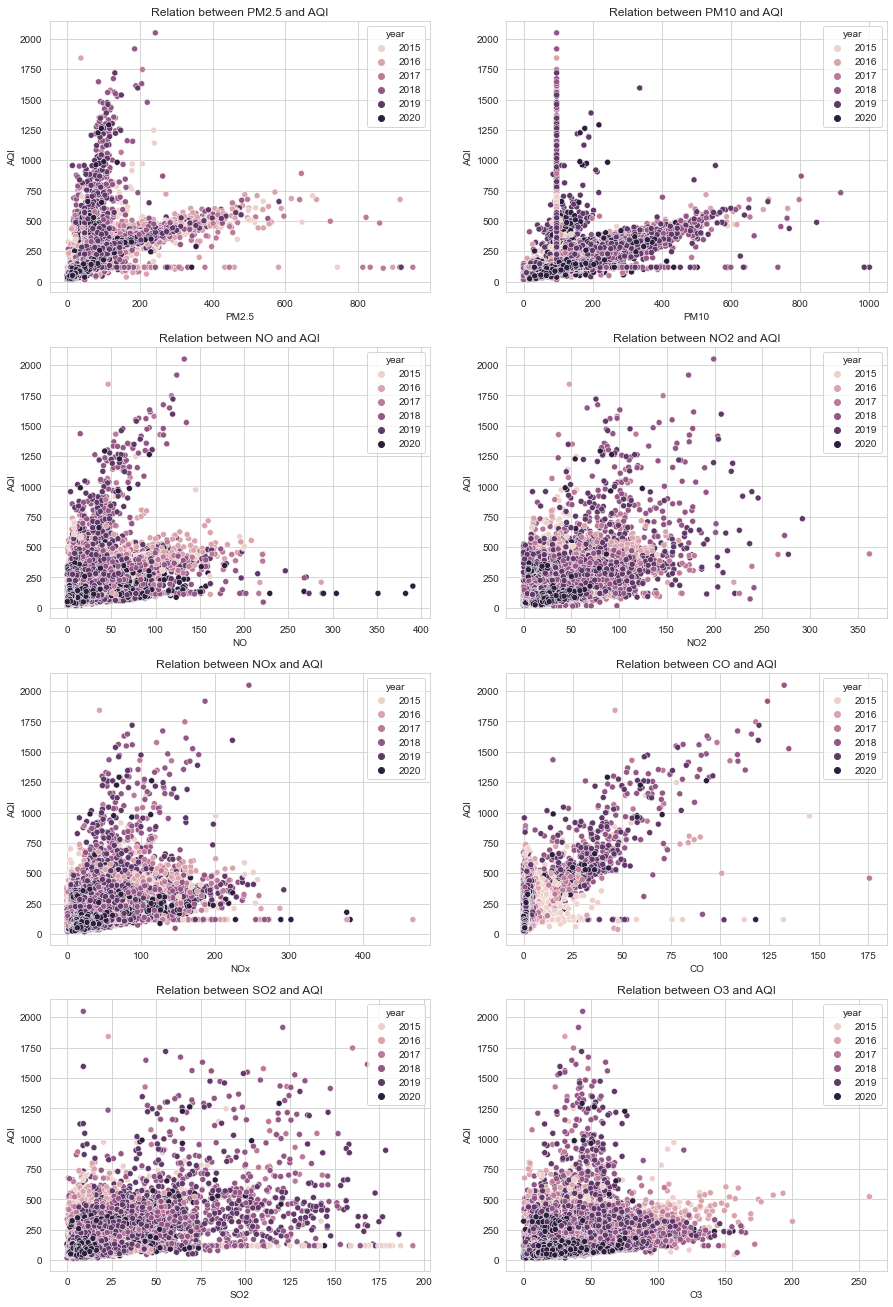

In [32]:
variables = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','CO', 'SO2','O3']
fig= plt.figure(figsize=(15,35))
for variable, num in zip(variables, range(1, len(variables) + 1)):
    ax = fig.add_subplot(6,2,num)
    sns.scatterplot(variable, 'AQI', hue='year', data=df1)
    plt.title('Relation between {} and AQI'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('AQI')

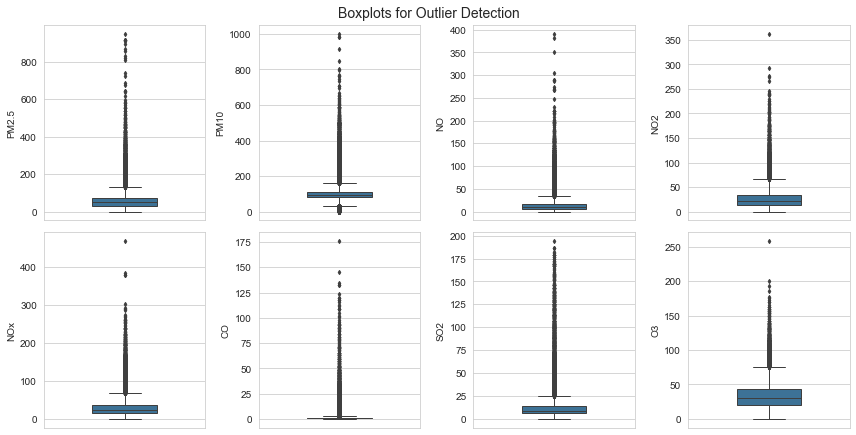

In [33]:
# Select the columns to check for outliers
cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2','O3']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(cols):
    sns.boxplot(y=df1[col], ax=axes[i], width=0.4, fliersize=3, linewidth=1, notch=False, saturation=0.6)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=10)

# Remove empty subplots
for i in range(len(cols), len(axes)):
    axes[i].remove()

# Add a title to the figure
fig.suptitle('Boxplots for Outlier Detection', fontsize=14)

# Adjust spacing between subplots and save the figure
fig.tight_layout()
plt.savefig('outlier_boxplots.png')
plt.show()


In [34]:
#create a list of columns to transform
cols_to_transform = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2','O3', 'AQI']

#apply the logarithm to each value in the specified columns
df1[cols_to_transform] = df1[cols_to_transform].apply(lambda x: np.log(x))

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


This operation is often used when the original data has a skewed distribution, and transforming it with a logarithm can help normalize the distribution, allowing for more accurate analysis and modeling.

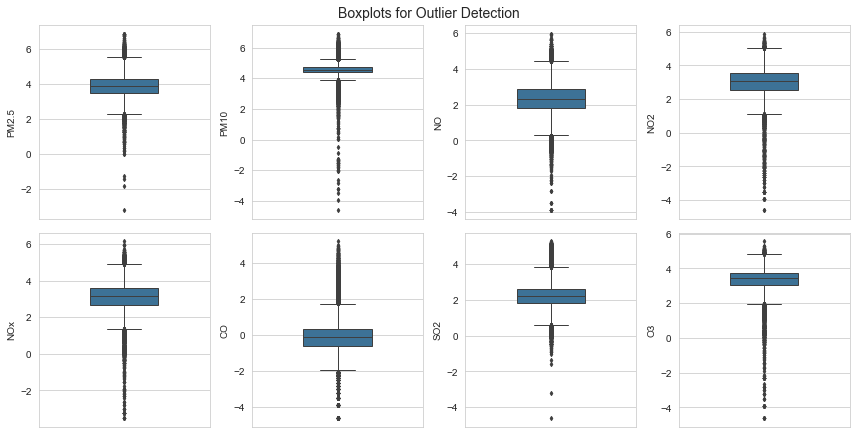

In [35]:

# Select the columns to check for outliers
cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2','O3']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(cols):
    sns.boxplot(y=df1[col], ax=axes[i], width=0.4, fliersize=3, linewidth=1, notch=False, saturation=0.6)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=10)

# Remove empty subplots
for i in range(len(cols), len(axes)):
    axes[i].remove()

# Add a title to the figure
fig.suptitle('Boxplots for Outlier Detection', fontsize=14)

# Adjust spacing between subplots and save the figure
fig.tight_layout()
plt.savefig('outlier_boxplots.png')
plt.show()


In [36]:
df1.drop(['Date'],axis=1,inplace=True)

In [37]:
# calculate interquartile range (IQR)
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# remove outliers
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-37-a75b26c97eca>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-37-a75b26c97eca>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


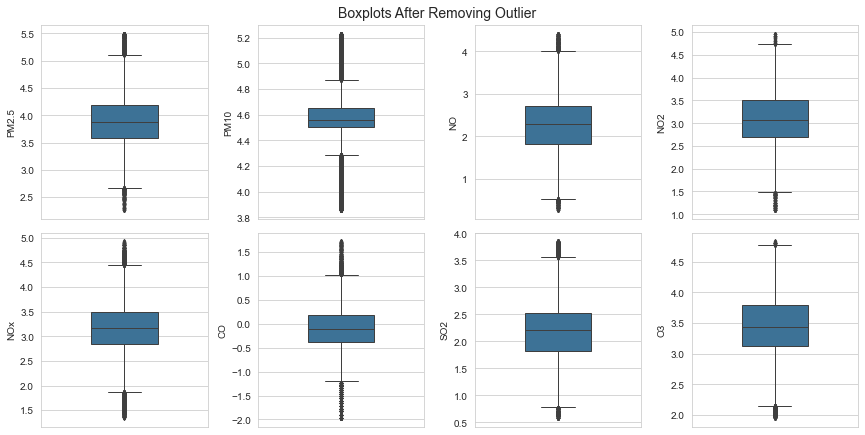

In [38]:

# Select the columns to check for outliers
cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2','O3']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(cols):
    sns.boxplot(y=df1[col], ax=axes[i], width=0.4, fliersize=3, linewidth=1, notch=False, saturation=0.6)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=10)

# Remove empty subplots
for i in range(len(cols), len(axes)):
    axes[i].remove()

# Add a title to the figure
fig.suptitle('Boxplots After Removing Outlier', fontsize=14)

# Adjust spacing between subplots and save the figure
fig.tight_layout()
plt.savefig('a_outlier_boxplots.png')
plt.show()


In [39]:
df1

,City,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,year
3,Ahmedabad,3.883006,4.561009,0.530628,2.916689,2.888704,0.530628,2.922624,3.585739,4.770685,Moderate,2015
15,Ahmedabad,3.883006,4.561009,0.488580,3.078233,3.129389,0.488580,3.644666,3.829293,4.770685,Moderate,2015
23,Ahmedabad,3.883006,4.561009,0.708036,3.015045,3.063391,0.708036,3.690628,3.480932,4.770685,Moderate,2015
25,Ahmedabad,3.883006,4.561009,0.819780,3.052113,3.082369,0.819780,3.778034,3.684620,4.770685,Moderate,2015
26,Ahmedabad,3.883006,4.561009,0.783902,3.077312,3.146735,0.783902,3.767691,3.716008,4.770685,Moderate,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
29524,Visakhapatnam,2.598979,4.069710,0.832909,3.072693,2.571849,-0.891598,2.102914,3.380314,4.343805,Satisfactory,2020
29526,Visakhapatnam,2.709383,3.930648,2.038620,3.221273,2.972464,-0.755023,2.145931,3.148453,3.713572,Good,2020
29527,Visakhapatnam,3.193763,4.305281,1.229641,3.260402,2.805177,-0.653926,2.543176,3.405853,4.248495,Satisfactory,2020
29528,Visakhapatnam,3.131573,4.185555,1.238374,3.385407,2.908539,-0.733969,2.130610,3.432696,4.219508,Satisfactory,2020


In [40]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)

categorical_attributes ['City', 'AQI_Bucket']


In [41]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['AQI_Bucket']=le.fit_transform(df1['AQI_Bucket'].astype(str))

# print the encoded labels and their corresponding categories
print("Encoded labels and their corresponding categories:")
for label in range(len(le.classes_)):
    print(f"{label}: {le.classes_[label]}")
df1
     

Encoded labels and their corresponding categories:
0: Good
1: Moderate
2: Poor
3: Satisfactory
4: Severe
5: Very Poor


<ipython-input-41-744b63b49c5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['City']=le.fit_transform(df1['City'].astype(str))
<ipython-input-41-744b63b49c5e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AQI_Bucket']=le.fit_transform(df1['AQI_Bucket'].astype(str))


,City,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket,year
3,0,3.883006,4.561009,0.530628,2.916689,2.888704,0.530628,2.922624,3.585739,4.770685,1,2015
15,0,3.883006,4.561009,0.488580,3.078233,3.129389,0.488580,3.644666,3.829293,4.770685,1,2015
23,0,3.883006,4.561009,0.708036,3.015045,3.063391,0.708036,3.690628,3.480932,4.770685,1,2015
25,0,3.883006,4.561009,0.819780,3.052113,3.082369,0.819780,3.778034,3.684620,4.770685,1,2015
26,0,3.883006,4.561009,0.783902,3.077312,3.146735,0.783902,3.767691,3.716008,4.770685,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
29524,24,2.598979,4.069710,0.832909,3.072693,2.571849,-0.891598,2.102914,3.380314,4.343805,3,2020
29526,24,2.709383,3.930648,2.038620,3.221273,2.972464,-0.755023,2.145931,3.148453,3.713572,0,2020
29527,24,3.193763,4.305281,1.229641,3.260402,2.805177,-0.653926,2.543176,3.405853,4.248495,3,2020
29528,24,3.131573,4.185555,1.238374,3.385407,2.908539,-0.733969,2.130610,3.432696,4.219508,3,2020


# Splitting Dataset


In [42]:
df1 = df1[~df1.isin([np.nan, np.inf, -np.inf]).any(1)]

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
y = df1["AQI"]
X = df1[['PM2.5', 'PM10', 'NOx','NO','NO2', 'CO', 'SO2','O3']]

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor with the training data
rf.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate mean squared error on test data
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

# Print the R-squared score of the model on the test set
print("R-squared score:", rf.score(X_test, y_test))


MSE:  0.03221000511320276
R-squared score: 0.8277715934068157


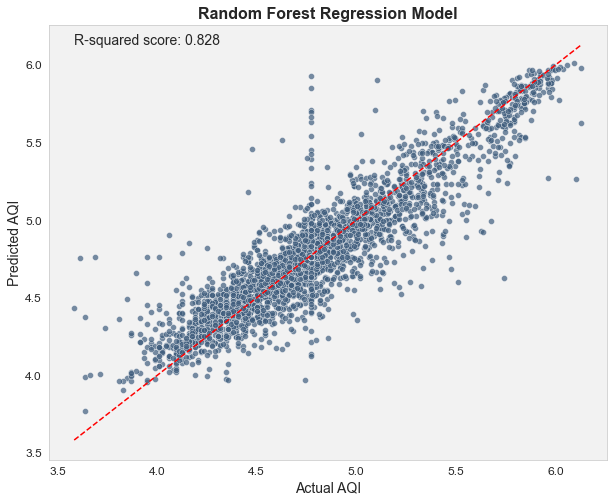

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create a scatterplot with actual vs predicted values
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, color='#3F5D7D', alpha=0.7)
plt.xlabel('Actual AQI', fontsize=14)
plt.ylabel('Predicted AQI', fontsize=14)
plt.title('Random Forest Regression Model', fontsize=16, fontweight='bold')

#Add a diagonal line for comparison
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

#Add text for R-squared value
plt.text(y_test.min(), y_test.max(), f"R-squared score: {rf.score(X_test, y_test):.3f}", fontsize=14)

#Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Add grid lines
plt.grid(color='#95A5A6', linestyle='--', linewidth=1, alpha=0.4)

#Set background color
ax = plt.gca()
ax.set_facecolor('#F2F2F2')

#Save the plot as a PNG image
plt.savefig('random_forest_regression.png', dpi=300, bbox_inches='tight')

plt.show()

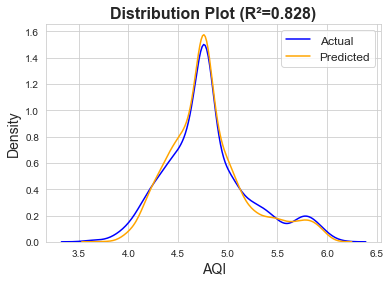

In [61]:
# Fit a random forest regression model to the data
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Create a distribution plot
sns.kdeplot(y_test, label='Actual', color='blue', alpha=0.5, linewidth=1.5)
sns.kdeplot(y_pred, label='Predicted', color='orange', alpha=0.5, linewidth=1.5)
plt.xlabel('AQI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title(f'Distribution Plot (R²={r2:.3f})', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.show()




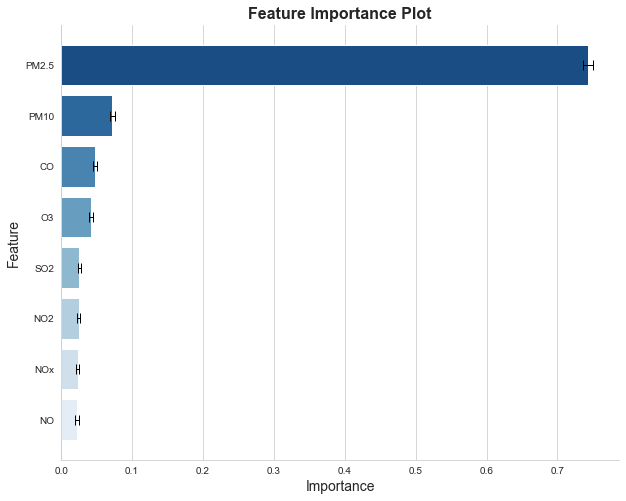

In [62]:
# Create a feature importance plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Set color palette
palette = sns.color_palette("Blues_r", len(indices))

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=importances[indices], y=[X.columns[i] for i in indices], palette=palette)

# Customize plot
ax.set_xlabel('Importance', fontsize=14)
ax.set_ylabel('Feature', fontsize=14)
ax.set_title('Feature Importance Plot', fontsize=16, fontweight='bold')
sns.despine()

# Add error bars
for i, v in enumerate(indices):
    ax.errorbar(importances[v], i, xerr=std[v], linestyle='None', color='black', linewidth=1, capsize=5)

# Show plot
plt.show()


In [106]:
# Apply inverse logarithm to predicted AQI values
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

# Define AQI thresholds for each category
aqi_thresholds = {
    'Good': (0, 50),
    'Moderate': (51, 100),
    'Satisfactory': (101, 200),
    'Poor': (201, 300),
    'Very Poor': (301, 400),
    'Severe': (401, 500)
}

# Create a list to hold the predicted AQI buckets
y_pred_bucket = []

# Assign the corresponding AQI bucket to each predicted AQI value
for aqi in y_pred:
    for bucket, threshold in aqi_thresholds.items():
        if aqi >= threshold[0] and aqi <= threshold[1]:
            y_pred_bucket.append(bucket)
            break




In [107]:
# Print the predicted AQI buckets
y_pred_bucket

['Satisfactory',
 'Moderate',
 'Good',
 'Satisfactory',
 'Satisfactory',
 'Moderate',
 'Moderate',
 'Satisfactory',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Moderate',
 'Satisfactory',
 'Satisfactory',
 'Moderate',
 'Moderate',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Very Poor',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Moderate',
 'Poor',
 'Moderate',
 'Moderate',
 'Satisfactory',
 'Poor',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Moderate',
 'Moderate',
 'Satisfactory',
 'Moderate',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Moderate',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Moderate',
 'Satisfactory',
 'Moderate',
 'Satisfactory',
 'Satisfactory',
 'Satisfactory',
 'Moderate',
 'Moderate',
 'Moderate',
 'Satisfactory',
 'Satisfac

In [51]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)

# Fit model to training data
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Calculate mean squared error on test data
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

# Print the R-squared score of the model on the test set
print("R-squared score:", xgb_model.score(X_test, y_test))

MSE:  0.03675839331132577
R-squared score: 0.8034511485892247


In [52]:
from sklearn.svm import SVR
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM model
svm_model = SVR(kernel='linear')

# Fit model to training data
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Calculate mean squared error on test data
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

# Print the R-squared score of the model on the test set
print("R-squared score:", svm_model.score(X_test, y_test))

MSE:  0.04995730688881524
R-squared score: 0.732875939233534


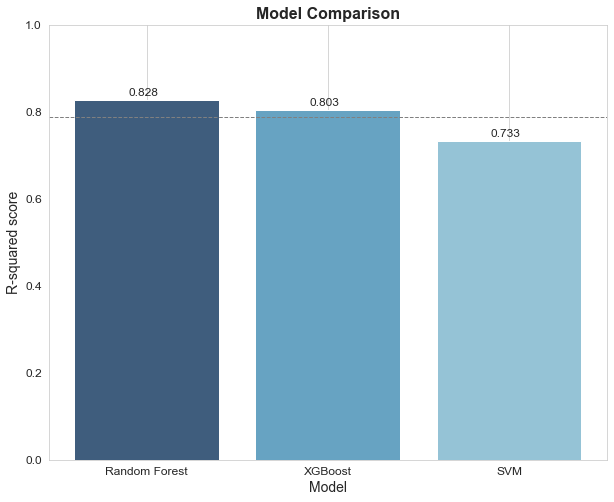

In [66]:
# Define the R-squared scores
scores = [rf.score(X_test, y_test), xgb_model.score(X_test, y_test), svm_model.score(X_test, y_test)]

# Define the models' names
models = ['Random Forest', 'XGBoost', 'SVM']

# Set the bar colors
colors = ['#3F5D7D', '#67A3C2', '#95C3D6']

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.bar(models, scores, color=colors)
plt.title('Model Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('R-squared score', fontsize=14)

# Add the scores as labels on top of the bars
for i, v in enumerate(scores):
    plt.text(i - 0.1, v + 0.01, str(round(v, 3)), fontsize=12)

# Add a horizontal line for the average score
plt.axhline(y=sum(scores)/len(scores), color='gray', linestyle='--', linewidth=1)

# Customize the plot
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show the plot
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
